In [3]:
from qiskit import QuantumCircuit, Aer, transpile
import numpy as np
import itertools as it
import time
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview


In [4]:
"""
d = 3

n = 4

for j in range( d**n ):

    print( np.base_repr(j, base=d).zfill(n) )
"""

'\nd = 3\n\nn = 4\n\n\n\nfor j in range( d**n ):\n\n    print( np.base_repr(j, base=d).zfill(n) )\n'

In [5]:
def Constructor(init_state, obs, theta_vec=[0]):
    #obs        = self.obs
    #init_state = self.init_state
    larg_bas   = [i for i in range(len(obs[0]))]
    indexs_comb     = list(it.product(larg_bas, repeat=len(obs)))
    qcs = []

    
    for theta in theta_vec:
        for i in range(len(indexs_comb)):
            qc = QuantumCircuit( len(obs), len(obs) )
            qc.compose( init_state, qubits=range(len(obs)), inplace=True )
            qc.barrier()

            if theta != 0:
                qc.ry(theta, 0)
            
            for j in range(len(indexs_comb[i])):
                qc.unitary( obs[j][indexs_comb[i][j]], j, label='{}_OBS:{}'.format(j, indexs_comb[i][j]) )
                        
            qc.barrier()    
            qc.measure( range(len(obs)), range(len(obs)) )
            qcs.append( qc )
  
    return qcs, indexs_comb

In [6]:
############
#  Input: matrices observables

obs = [ [ np.eye(2), np.array([ [1,1], [1,-1] ])/np.sqrt(2)],
         [ np.eye(2), np.array([ [1,1], [1,-1] ])/np.sqrt(2) ]]


#################################
# angulo de rotacion de base de medida

number_of_thetas = 15
theta_vec = np.linspace(0,2*np.pi,number_of_thetas)

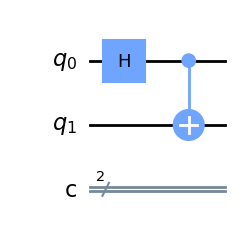

In [7]:
#######################
#  Input: Estado de entrada 


init_state = QuantumCircuit(len(obs), len(obs) )
init_state.h(0)
init_state.cx(0,1)
init_state.draw(output='mpl')

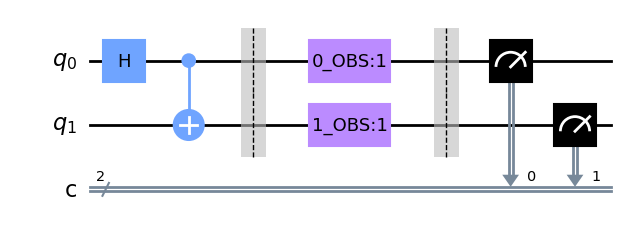

In [8]:

bell_circuits, indexs_comb = Constructor( init_state, obs ,theta_vec)
bell_circuits[3].draw(output='mpl')


In [9]:
simulator = Aer.get_backend('aer_simulator')
job = simulator.run( bell_circuits )
results = job.result()
counts = results.get_counts()

In [10]:
################################
# Parametrizacion de desigualdad

#Sabxy = [(1,1,-1,1), (1,1,-1,1), (1,1,-1,1), (1,1,-1,1)]
Sabxy = [(1,1,-1,1)]
S = 2
print(indexs_comb)

[(0, 0), (0, 1), (1, 0), (1, 1)]


In [11]:

def dict2array(counts, n_qubits ):
    p = np.zeros( 2**n_qubits )

    for idx in counts :
        
        idx = idx.replace(' ','')

        p[ int(idx[::-1],2) ] = counts[idx]

               

    return p #.reshape( n_qubits*[2] )



In [12]:
def Witness( counts, Sabxy, S, indexs_comb ): # agregar opcion de entregar observable o probabilidad
    """




    """
    Inequality = [[] for k in range(len(indexs_comb))]
    result = []
    Sabxy = np.array(Sabxy)
    # Divide the list of dictionaries in sets of the number of combinations 2**(num de qubits)
    
    if Sabxy.ndim == 1:    
        for i in range(0, len(counts), len(indexs_comb)): 
            theta_dict = counts[i:i + len(indexs_comb)]
            for f in range(len(indexs_comb)):
                Inequality[f] = theta_dict[f]
            
            no_shots = sum(Inequality[-1][y] for y in Inequality[-1])
            chsh1 = 0

            for j in range(len(Inequality)):
                for element in Inequality[j]:
                    value  = 0
                    parity = (-1)**(int(element[0])+int(element[1])) # (int(element[k]) for k in range(len(ement)))
                    chsh1 += parity*Inequality[j][element]*(Sabxy[j])

            result.append(chsh1/no_shots)

    elif Sabxy.ndim == 2: # sum of probs
        for i in range(0, len(counts), len(indexs_comb)):
            counts_temp = counts[i:i + len(indexs_comb)]
            chsh = 0
            for j, count in enumerate(counts_temp):
                prob     = dict2array(count, 2 ) # 2 == > Es n_qubits ; numero de qubits
                no_shots = np.sum(prob)
                
                chsh += np.sum(prob*Sabxy[j])/no_shots

        result.append(chsh)





    for j, k in enumerate(result):
        if k > 2:
            print("The inequality has been broken in the circuit number {} with value {}!".format(j, k))
    
    return result, Inequality


In [15]:
result, vered = Witness(counts,Sabxy, S, indexs_comb)
##print(vered)
print(result)
#print(counts)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [24]:
obs = [ [ np.eye(2), np.array([ [1,1], [1,-1] ])/np.sqrt(2) ],
         [ np.eye(2), np.array([ [1,1], [1,-1] ])/np.sqrt(2) ],
         [ np.eye(2), np.array([ [1,1], [1,-1] ])/np.sqrt(2) ]]
larg_bas   = [i for i in range(len(obs[0]))]
indexs_comb     = list(it.product(larg_bas, repeat=len(obs)))


obs = np.array(obs)
indd2 = obs.shape[1]**obs.shape[0]

n_qubits = obs.shape[0]
n_obs      = obs.shape[1]

obs_conf = []
for j in range(  n_obs**n_qubits ):
    obs_conf.append( np.base_repr( j, base=n_obs ).zfill( n_qubits ))

    
print(obs_conf)
print(indexs_comb)
print(indd2)





['000', '001', '010', '011', '100', '101', '110', '111']
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
8
